<a href="https://colab.research.google.com/github/ftheodoreadriano/it-cert-automation-practice/blob/improve-username-behavior/Coba_coba_FaceNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Models

The saved models can be downloaded here : 



*   FaceNet (ini yang fix) : https://drive.google.com/drive/folders/1I0s5-goRvowMf58994l_xoV8dtL5fqnE?usp=sharing
*   yolov3 : https://drive.google.com/drive/folders/1nyrWCDc5Ae8hzrmaGpyF-aE37hL_Yzro?usp=sharing
*   fake face classification (xception) : https://drive.google.com/drive/folders/1pciVugNqxhCiaauMbkaUaOQx9ML9y81M?usp=sharing






# FaceNet

Trying FaceNet implemented on Keras and trained on MSCeleb 1M Dataset. 

Courtesy of Hiroki Taniai : 

https://drive.google.com/drive/folders/1pwQ3H4aJ8a6yyJHZkTwtjcL4wYWQb7bn

In [ ]:
import os
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Load model from Google Drive
model = tf.keras.models.load_model('/content/drive/MyDrive/keras-facenet/model/facenet_keras.h5')

model.summary()

In [ ]:
model.inputs

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]

In [ ]:
# Load trained weights (trained on MSCeleb Dataset?)
model.load_weights('/content/drive/MyDrive/keras-facenet/weights/facenet_keras_weights.h5')

In [ ]:
!pip install mtcnn

In [ ]:
from PIL import Image, ImageOps
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from google.colab import files

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    image = ImageOps.exif_transpose(image)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # print(results)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array
 
# load the photo and extract the face
# upload = files.upload()
# imgs = []
# for image_name in upload.keys() : 
#     imgs.append(extract_face(image_name))
#     print(f'{image_name} converted')

In [ ]:
detector = MTCNN()
import cv2

img = cv2.cvtColor(cv2.imread('/content/1621073091030.jpg'),cv2.COLOR_BGR2RGB)
detector.detect_faces(img)

[{'box': [1146, 1719, 1631, 2067],
  'confidence': 0.9999308586120605,
  'keypoints': {'left_eye': (1563, 2505),
   'mouth_left': (1612, 3337),
   'mouth_right': (2204, 3358),
   'nose': (1892, 2865),
   'right_eye': (2318, 2508)}},
 {'box': [1449, 3965, 205, 263],
  'confidence': 0.9998151659965515,
  'keypoints': {'left_eye': (1519, 4073),
   'mouth_left': (1535, 4180),
   'mouth_right': (1608, 4174),
   'nose': (1570, 4118),
   'right_eye': (1615, 4064)}}]

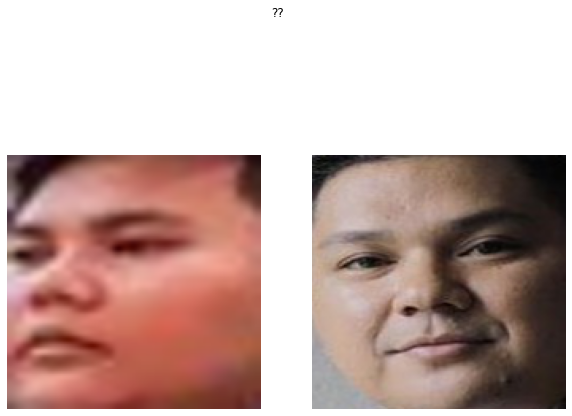

In [ ]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,10))
fig, axs = plt.subplots(1,2, figsize = (10,8))

fig.suptitle('??')
axs[0].imshow(imgs[0])
axs[0].axis('off')
axs[1].imshow(imgs[1])
axs[1].axis('off')

plt.show()

In [ ]:
import numpy as np
sample = []
for i in range(len(imgs)) : 
    imgs[i] = imgs[i].astype('float32')
    m, s = imgs[i].mean(), imgs[i].std()
    imgs[i] = (imgs[i]-m)/s
    sample.append(np.expand_dims(imgs[i],axis=0))

In [ ]:
y0 = model.predict(sample[0])[0]
y1 = model.predict(sample[1])[0]
# y2 = model.predict(sample[2])[0]

# Normalize y0 and y1
y0 = y0/np.linalg.norm(y0)
y1 = y1/np.linalg.norm(y1)

In [ ]:
cos = (y0 @ y1)/(np.linalg.norm(y0) * np.linalg.norm(y1))
dist = np.linalg.norm(y0-y1)

print(f'The similarity (cosine) is  : {cos}')
print(f'The distance is : {dist}')
print(f'Test : {np.sqrt(2) * np.sqrt(1-cos)}')

The similarity (cosine) is  : 0.5605736374855042
The distance is : 0.9374715089797974
Test : 0.9374714529141631


In [ ]:
(y0 @ y2) / (np.linalg.norm(y0) * np.linalg.norm(y2))

0.28409103

# FaceNet v2

Using FaceNet trained on VGGFace Dataset

Courtesy of David Sandberg : 

https://github.com/davidsandberg/facenet

In [ ]:
from google.colab import drive
import tensorflow as tf
import os
import numpy as np
import pandas as pd

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the model on MyDrive
model = tf.keras.models.load_model('/content/drive/MyDrive/keras-facenet-v2/facenet_keras.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/core.py:1061: UserWarning: inception_resnet_v1 is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


In [ ]:
model.summary()

In [ ]:
# Load weights
model.load_weights('/content/drive/MyDrive/keras-facenet-v2/facenet_keras_weights.h5')

In [ ]:
# save as SavedModel
model.save('/content/drive/MyDrive/keras-facenet-v2/facenet_savedmodel')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/keras-facenet-v2/facenet_savedmodel/assets


In [ ]:
# convert to tflite

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

# Save the model.
with open('/content/drive/MyDrive/keras-facenet-v2/facenet.tflite', 'wb') as f:
  f.write(tflite_model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmp7r62r2o9/assets


INFO:tensorflow:Assets written to: /tmp/tmp7r62r2o9/assets


## Experimenting with threshold values

In [ ]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz -O /content/lfw-funneled.tgz

--2021-05-21 02:19:44--  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243346528 (232M) [application/x-gzip]
Saving to: ‘/content/lfw-funneled.tgz’

/content/lfw-funnel 100%[===================>] 232.07M  72.9MB/s    in 3.4s    

2021-05-21 02:19:48 (69.2 MB/s) - ‘/content/lfw-funneled.tgz’ saved [243346528/243346528]



In [ ]:
!tar -xzvf /content/lfw-funneled.tgz -C /content/

In [ ]:
# How many people are in the list
lst = os.listdir('/content/lfw_funneled')
lst = sorted(lst)

len(lst)

5760

In [ ]:
# Pairs for testing
!wget http://vis-www.cs.umass.edu/lfw/pairs.txt -O /content/pairs.txt

--2021-05-21 02:23:49--  http://vis-www.cs.umass.edu/lfw/pairs.txt
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155335 (152K) [text/plain]
Saving to: ‘/content/pairs.txt’

/content/pairs.txt  100%[===================>] 151.69K  --.-KB/s    in 0.1s    

2021-05-21 02:23:49 (1.38 MB/s) - ‘/content/pairs.txt’ saved [155335/155335]



In [ ]:
# read pairs.txt
person1 = []
person2 = []
img1 = []
img2 = []
with open('/content/pairs.txt','r') as p : 
    l = p.readlines()
    for line in l[1:] : 
        lst = line.strip('\n').split('\t')
        # print(lst)
        person1.append(lst[0])
        img1.append(lst[1])
        if lst[2][0].isalpha() : 
            # print('alpha')
            person2.append(lst[2])
            img2.append(lst[3])
        elif lst[2].isnumeric():
            # print('Numeric')
            person2.append(lst[0])
            img2.append(lst[2])

# Create a dataframe for pairs.txt
pairs_dict = {'person1' : person1,
              'img1' : img1,
              'person2' : person2,
              'img2' : img2}

df = pd.DataFrame(pairs_dict)
df

,person1,img1,person2,img2
0,Abel_Pacheco,1,Abel_Pacheco,4
1,Akhmed_Zakayev,1,Akhmed_Zakayev,3
2,Akhmed_Zakayev,2,Akhmed_Zakayev,3
3,Amber_Tamblyn,1,Amber_Tamblyn,2
4,Anders_Fogh_Rasmussen,1,Anders_Fogh_Rasmussen,3
...,...,...,...,...
5995,Scott_Wolf,2,Troy_Polamalu,1
5996,Sergei_Alexandrovitch_Ordzhonikidze,1,Yolanda_King,1
5997,Shane_Loux,1,Val_Ackerman,1
5998,Shawn_Marion,1,Shirley_Jones,1


In [ ]:
# Add same/not column to pairs df
df['same_or_not'] = (df['person1'] == df['person2'])

df

,person1,img1,person2,img2,same_or_not
0,Abel_Pacheco,1,Abel_Pacheco,4,True
1,Akhmed_Zakayev,1,Akhmed_Zakayev,3,True
2,Akhmed_Zakayev,2,Akhmed_Zakayev,3,True
3,Amber_Tamblyn,1,Amber_Tamblyn,2,True
4,Anders_Fogh_Rasmussen,1,Anders_Fogh_Rasmussen,3,True
...,...,...,...,...,...
5995,Scott_Wolf,2,Troy_Polamalu,1,False
5996,Sergei_Alexandrovitch_Ordzhonikidze,1,Yolanda_King,1,False
5997,Shane_Loux,1,Val_Ackerman,1,False
5998,Shawn_Marion,1,Shirley_Jones,1,False


In [ ]:
# Change the img number formatting to 00XX
df['img1'] = df['img1'].apply(lambda x : x.zfill(4))
df['img2'] = df['img2'].apply(lambda x : x.zfill(4))
df

,person1,img1,person2,img2,same_or_not
0,Abel_Pacheco,0001,Abel_Pacheco,0004,True
1,Akhmed_Zakayev,0001,Akhmed_Zakayev,0003,True
2,Akhmed_Zakayev,0002,Akhmed_Zakayev,0003,True
3,Amber_Tamblyn,0001,Amber_Tamblyn,0002,True
4,Anders_Fogh_Rasmussen,0001,Anders_Fogh_Rasmussen,0003,True
...,...,...,...,...,...
5995,Scott_Wolf,0002,Troy_Polamalu,0001,False
5996,Sergei_Alexandrovitch_Ordzhonikidze,0001,Yolanda_King,0001,False
5997,Shane_Loux,0001,Val_Ackerman,0001,False
5998,Shawn_Marion,0001,Shirley_Jones,0001,False


In [ ]:
# Install mtcnn for face extraction
!pip install mtcnn

     |████████████████████████████████| 2.3MB 6.7MB/s 


In [ ]:
# Function to extract face and preprocess for model input
from PIL import Image, ImageOps
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from google.colab import files

detector = MTCNN()
# extract a single face from a given photograph
def preprocess(filename, required_size=(160, 160),detector = detector):
    # load image from file
    image = Image.open(filename)
    image = ImageOps.exif_transpose(image)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # print(results)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    display(image)
    face_array = asarray(image)
    
    # preprocess array for input
    input = face_array.copy()
    input = input.astype('float32')
    m, s = input.mean(), input.std()
    input = (input-m)/s
    return np.expand_dims(input,axis=0)


In [ ]:
# Just for debugging
# detector = MTCNN()
filename = '/content/lfw_funneled/Abel_Pacheco/Abel_Pacheco_0001.jpg'
image = Image.open(filename)
image = ImageOps.exif_transpose(image)
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
# pixels = asarray(image)
# detector.detect_faces(pixels)

In [ ]:
# Test each data in the df with the facenet to check cosine similarity
main_dir = '/content/lfw_funneled/'

cos_sim = [0 for i in (df.index)]
for i in (df.index):
    person1_dir = main_dir + df['person1'][i] + '/' + df['person1'][i] + '_' + df['img1'][i] + '.jpg'
    person2_dir = main_dir + df['person2'][i] + '/' + df['person2'][i] + '_' + df['img2'][i] + '.jpg'
    p1 = preprocess(person1_dir)
    p2 = preprocess(person2_dir)
    e1 = model.predict(p1)[0]
    e2 = model.predict(p2)[0]
    cos_sim[i] = e1 @ e2

df['cos_sim'] = cos_sim
df.to_csv('/content/test.csv')

In [ ]:
# Create predictions for threshold values from [0,1]
thresh = np.arange(0,1.001,0.001)
tp = [] # true positives
tn = [] # true negatives
fp = [] # false positives
fn = [] # false negatives

for t in thresh : 
    df[f'thresh_{t}'] = df['cos_sim'] > t
    pos_df = df[df['same_or_not'] == 1]
    neg_df = df[df['same_or_not'] == 0]
    tp.append(sum(pos_df['same_or_not'] == pos_df[f'thresh_{t}']))
    tn.append(sum(neg_df['same_or_not'] == neg_df[f'thresh_{t}']))
    fp.append(sum(neg_df['same_or_not'] ^ neg_df[f'thresh_{t}']))
    fn.append(sum(pos_df['same_or_not'] ^ pos_df[f'thresh_{t}']))

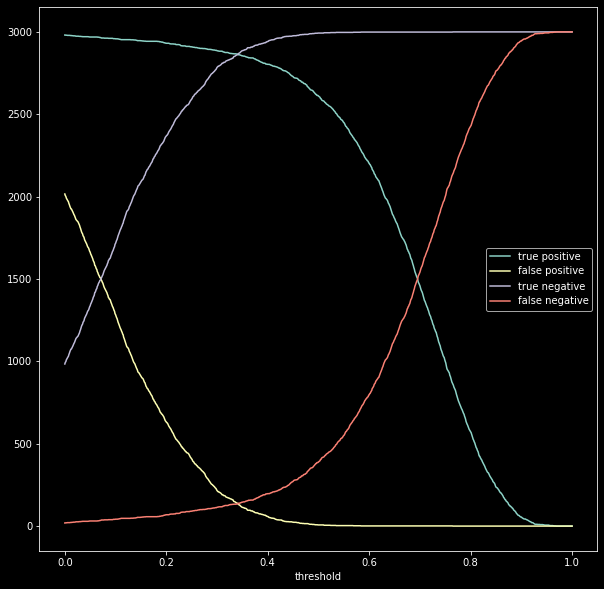

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(10,10))

plt.plot(thresh,tp,label='true positive')
plt.plot(thresh,fp, label='false positive')
plt.plot(thresh,tn, label='true negative')
plt.plot(thresh,fn, label='false negative')
# plt.plot([thresh[341]for i in range(3000)],np.linspace(0,3000,3000),'--',color='orange')
plt.xlabel('threshold')
plt.legend()
plt.show()

In [ ]:
# true positive rate and true negative rate
plt.figure(figsize=(10,10))
tpr = [tp[i]/(tp[i] + fn[i]) for i in range(len(tp))]
tnr = [tn[i]/(tn[i] + fp[i]) for i in range(len(tn))]
fpr = [1-tnr[i] for i in range(len(tnr))]
tpr2, fpr2 = (list(t) for t in zip(*sorted(zip(tpr,fpr))))
tpr2.append(1)
fpr2.append(1)

naive = np.linspace(0,1,1000)
plt.plot(fpr2,tpr2, label='facenet')
plt.plot(naive,naive, label='50%')
plt.plot(fpr[550],tpr[550],marker='o',color='red')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

[Based on the LFW test set]

Prioritize low false positive rate

Choose the threshold : Around $0.55$ for cosine similarity.


In [ ]:
# Test
im1 = preprocess('/content/Screen Shot 2021-05-18 at 22.33.05.png')
im2 = preprocess('/content/waw12.jpg')

p1 = model.predict(im1)[0]
p2 = model.predict(im2)[0]

p1 @ p2

0.52200043

# Test with Firebase (Registering a patient's face)

In [ ]:
!pip install virtualenv

     |████████████████████████████████| 7.2MB 12.6MB/s 
     |████████████████████████████████| 348kB 48.8MB/s 


In [ ]:
!pip install --upgrade google-cloud-firestore

In [ ]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

In [ ]:
# Use a service account
cred = credentials.Certificate('/content/q-hope-3b34d8a7bf60.json')
firebase_admin.initialize_app(cred)

db = firestore.client()
# bucket = storage.bucket(app=db)

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load FaceNet model and fakevsreal model
import tensorflow as tf

# facenet
# facenet = tf.keras.models.load_model('/content/drive/MyDrive/keras-facenet-v2/facenet_keras.h5') # nanti load modelnya harus pakai yg SavedModel ya?
# facenet.load_weights('/content/drive/MyDrive/keras-facenet-v2/facenet_keras_weights.h5')

facenet = tf.keras.models.load_model('/content/drive/MyDrive/keras-facenet-v2/facenet_savedmodel')

# fakevsreal (xception)
fakereal = tf.keras.models.load_model('/content/drive/MyDrive/xception1/xception27052021_input160160.hdf5')
fakereal.load_weights('/content/drive/MyDrive/xception1/weights_trained_with_augmentation/02-0.93.hdf5')

In [ ]:
# preprocess image (face detection + crop + resize to 160x160)
# ini fungsi fungsi buat preprocess imagenya
import cv2 as cv
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow # just for showing images in colab

# Read and load yolov3 model
cfgpath = '/content/drive/MyDrive/yolov3_face/yolov3.cfg'    # cfg path of yolo model
weightpath = '/content/drive/MyDrive/yolov3_face/backup/yolov3.weights' # weights path of yolo model
net = cv.dnn.readNet(weightpath, cfgpath) # load model
layer_names = net.getLayerNames() # get model layer names
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()] # get output layer of yolo model


# standardize input ( (-mean)/std)
def preprocess_standardize(img_path, resize_size, confidence_threshold = 0.5, nms_threshold = 0.6) : 
    # read image
    img = cv.imread(img_path) # baca image dri directory
    # convert image for the yolov3 inputs
    blob = cv.dnn.blobFromImage(img, 1.0/255.0, (416,416), swapRB= True,crop = False)
    # Feed the input to yolov3
    net.setInput(blob)
    outputs = net.forward(output_layers)

    # Convert outputs from yolo into lists of bboxes and confidence scores
    boxes = []
    confidences = []
    h,w = img.shape[:2]
    for out in outputs : 
        for o in out : 
            scores = o[5:]
            c_id = np.argmax(scores)
            conf = scores[c_id]
            if conf > confidence_threshold : 
                box = o[:4] * np.array([w,h,w,h])
                (centerX,centerY, width,height) = box.astype('int')
                x = int(centerX - (width/2))
                y = int(centerY - (height/2))
                box = [x, y, int(width), int(height)]

                boxes.append(box)
                confidences.append(float(conf))
    
    # Get indices of the top 1 detected face
    indices = cv.dnn.NMSBoxes(boxes, confidences, score_threshold=confidence_threshold,
                              nms_threshold = nms_threshold, top_k = 1)
    if len(indices) > 0 : 
        for i in indices.flatten():
            (x,y) = (boxes[i][0], boxes[i][1])
            (w,h) = (boxes[i][2], boxes[i][3])
            # Change points to zero if bbox is negative
            x = 0 if x < 0 else x
            y = 0 if y < 0 else y
            crop_img = img[y:y+h, x:x+w]
            crop_img = cv.resize(crop_img, resize_size)
            cv2_imshow(crop_img)

    # Normalize image and turn into np array
    crop_img = np.asarray(crop_img)
    crop_img = crop_img.astype('float32')
    mean,std = crop_img.mean(), crop_img.std()
    crop_img = (crop_img - mean)/std
    return np.expand_dims(crop_img,axis=0)


# preprocess normalize (divides each rgb value by 255)
def preprocess_normalize(img_path, resize_size, confidence_threshold = 0.5, nms_threshold = 0.6) : 
    # read image
    img = cv.imread(img_path)
    # convert image for the yolov3 inputs
    blob = cv.dnn.blobFromImage(img, 1.0/255.0, (416,416), swapRB= True,crop = False)
    # Feed the input to yolov3
    net.setInput(blob)
    outputs = net.forward(output_layers)

    # Convert outputs from yolo into lists of bboxes and confidence scores
    boxes = []
    confidences = []
    h,w = img.shape[:2]
    for out in outputs : 
        for o in out : 
            scores = o[5:]
            c_id = np.argmax(scores)
            conf = scores[c_id]
            if conf > confidence_threshold : 
                box = o[:4] * np.array([w,h,w,h])
                (centerX,centerY, width,height) = box.astype('int')
                x = int(centerX - (width/2))
                y = int(centerY - (height/2))
                box = [x, y, int(width), int(height)]

                boxes.append(box)
                confidences.append(float(conf))
    
    # Get indices of the top 1 detected face
    indices = cv.dnn.NMSBoxes(boxes, confidences, score_threshold=confidence_threshold,
                              nms_threshold = nms_threshold, top_k = 1)
    if len(indices) > 0 : 
        for i in indices.flatten():
            (x,y) = (boxes[i][0], boxes[i][1])
            (w,h) = (boxes[i][2], boxes[i][3])
            # Change points to zero if bbox is negative
            x = 0 if x < 0 else x
            y = 0 if y < 0 else y
            crop_img = img[y:y+h, x:x+w]
            crop_img = cv.resize(crop_img, resize_size)
            cv2_imshow(crop_img)

    # Normalize image and turn into np array
    crop_img = np.asarray(crop_img)
    crop_img = crop_img.astype('float32')
    crop_img = crop_img / 255.0
    return np.expand_dims(crop_img,axis=0)

In [ ]:
# Test
someone_norm = preprocess_normalize('/content/drive/MyDrive/images/barra stevi.png', (160,160))
someone_standard = preprocess_standardize('/content/drive/MyDrive/images/barra stevi.png', (160,160))

# Check if face is "real"
real = fakereal.predict(someone_standard)[0]

if real > 0.5 : # if face is predicted as real, get embedding and save it in database
    # Save embedding into dictionary
    embedding = facenet.predict(someone_norm)[0]
    embedding = embedding.astype('float')
    embedding = list(embedding)
    data = {u'Face Embedding' : embedding}
    print('face embedding : {}'.format(embedding))

    # Add data to database
    db.collection(u'user_data').document(u'MHaxZVBP0TrjV8bDfHcu').set(data,merge=True)
else : # face is predicted as fake
    print('Face does not qualify')

Nanti kalau dijadiin ```.py``` mungkin 2 cell di atas dijadiin fungsi sama ```__main__``` ya?

Sama modelnya harus dari format *SavedModel* ?

In [ ]:
from PIL import Image
import numpy as np
import cv2 as cv
import requests

url = 'https://interculturaltalk.com/wp-content/uploads/2019/11/Deepfake-Sample-Image-1004x502.jpg'

im = Image.open(requests.get(url, stream = True).raw)

cv_im = np.array(im)
cv_im = cv_im[:,:,::-1].copy()

# cv.resize(cv_im, (160,160))

# Test firebase (open images from url)

In [ ]:
# preprocess image (face detection + crop + resize to 160x160) FROM URL
import cv2 as cv
import numpy as np
import tensorflow as tf
from PIL import Image
from google.colab.patches import cv2_imshow # just for showing images in colab

# Read and load yolov3 model
cfgpath = '/content/drive/MyDrive/yolov3_face/yolov3.cfg'    # cfg path of yolo model
weightpath = '/content/drive/MyDrive/yolov3_face/backup/yolov3.weights' # weights path of yolo model
net = cv.dnn.readNet(weightpath, cfgpath) # load model
layer_names = net.getLayerNames() # get model layer names
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()] # get output layer of yolo model


# standardize input ( (-mean)/std)
def preprocess_standardize_url(img_path, resize_size, confidence_threshold = 0.5, nms_threshold = 0.6) : 
    # read image from url
    img = Image.open(requests.get(img_path, stream = True).raw)
    img = np.array(img)
    img = img[:,:,::-1].copy()
    # convert image for the yolov3 inputs
    blob = cv.dnn.blobFromImage(img, 1.0/255.0, (416,416), swapRB= True,crop = False)
    # Feed the input to yolov3
    net.setInput(blob)
    outputs = net.forward(output_layers)

    # Convert outputs from yolo into lists of bboxes and confidence scores
    boxes = []
    confidences = []
    h,w = img.shape[:2]
    for out in outputs : 
        for o in out : 
            scores = o[5:]
            c_id = np.argmax(scores)
            conf = scores[c_id]
            if conf > confidence_threshold : 
                box = o[:4] * np.array([w,h,w,h])
                (centerX,centerY, width,height) = box.astype('int')
                x = int(centerX - (width/2))
                y = int(centerY - (height/2))
                box = [x, y, int(width), int(height)]

                boxes.append(box)
                confidences.append(float(conf))
    
    # Get indices of the top 1 detected face
    indices = cv.dnn.NMSBoxes(boxes, confidences, score_threshold=confidence_threshold,
                              nms_threshold = nms_threshold, top_k = 1)
    if len(indices) > 0 : 
        for i in indices.flatten():
            (x,y) = (boxes[i][0], boxes[i][1])
            (w,h) = (boxes[i][2], boxes[i][3])
            # Change points to zero if bbox is negative
            x = 0 if x < 0 else x
            y = 0 if y < 0 else y
            crop_img = img[y:y+h, x:x+w]
            # print(crop_img)
            crop_img = cv.resize(crop_img, resize_size)
            cv2_imshow(crop_img)

    # Normalize image and turn into np array
    crop_img = np.asarray(crop_img)
    crop_img = crop_img.astype('float32')
    mean,std = crop_img.mean(), crop_img.std()
    crop_img = (crop_img - mean)/std
    return np.expand_dims(crop_img,axis=0)


# preprocess normalize (divides each rgb value by 255)
def preprocess_normalize_url(img_path, resize_size, confidence_threshold = 0.5, nms_threshold = 0.6) : 
    # read image
    img = Image.open(requests.get(img_path, stream = True).raw)
    img = np.array(img)
    img = img[:,:,::-1].copy()
    # convert image for the yolov3 inputs
    blob = cv.dnn.blobFromImage(img, 1.0/255.0, (416,416), swapRB= True,crop = False)
    # Feed the input to yolov3
    net.setInput(blob)
    outputs = net.forward(output_layers)

    # Convert outputs from yolo into lists of bboxes and confidence scores
    boxes = []
    confidences = []
    h,w = img.shape[:2]
    for out in outputs : 
        for o in out : 
            scores = o[5:]
            c_id = np.argmax(scores)
            conf = scores[c_id]
            if conf > confidence_threshold : 
                box = o[:4] * np.array([w,h,w,h])
                (centerX,centerY, width,height) = box.astype('int')
                x = int(centerX - (width/2))
                y = int(centerY - (height/2))
                box = [x, y, int(width), int(height)]

                boxes.append(box)
                confidences.append(float(conf))
    
    # Get indices of the top 1 detected face
    indices = cv.dnn.NMSBoxes(boxes, confidences, score_threshold=confidence_threshold,
                              nms_threshold = nms_threshold, top_k = 1)
    if len(indices) > 0 : 
        for i in indices.flatten():
            (x,y) = (boxes[i][0], boxes[i][1])
            (w,h) = (boxes[i][2], boxes[i][3])
            # Change points to zero if bbox is negative
            x = 0 if x < 0 else x
            y = 0 if y < 0 else y
            print(f'x : {x}, y : {y}, w : {w}, h : {h}')
            crop_img = img[y:y+h, x:x+w]
            # print(crop_img)
            crop_img = cv.resize(crop_img, resize_size)
            cv2_imshow(crop_img)

    # Normalize image and turn into np array
    crop_img = np.asarray(crop_img)
    crop_img = crop_img.astype('float32')
    crop_img = crop_img / 255.0
    return np.expand_dims(crop_img,axis=0)

In [ ]:
fakereal.predict(someone_standard)[0]

array([0.32689533], dtype=float32)

x : 803, y : 77, w : 318, h : 571


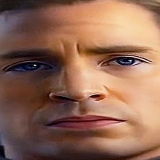

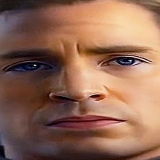

real? : [1.4898262e-06]
Face does not qualify


In [ ]:
# Test data from url
url = 'https://cdn.gamer-network.net/2020/articles/2020-08-28-12-14/someone-made-a-deepfake-of-the-avengers-game-with-marvel-movie-faces-1598613264710.jpg/EG11/thumbnail/1920x1079/format/jpg/quality/80'


# Test
someone_norm = preprocess_normalize_url(url, (160,160))
someone_standard = preprocess_standardize_url(url, (160,160))

# Check if face is "real"
real = fakereal.predict(someone_standard)[0]
print(f'real? : {real}')

if real > 0.5 : # if face is predicted as real, get embedding and save it in database
    # Save embedding into dictionary
    embedding = facenet.predict(someone_norm)[0]
    embedding = embedding.astype('float')
    embedding = list(embedding)
    data = {u'Face Embedding' : embedding}

    print(data)

    # Add data to database
    # db.collection(u'user_data').document(u'MHaxZVBP0TrjV8bDfHcu').set(data,merge=True)
else : # face is predicted as fake
    print('Face does not qualify')